In [349]:
# Library Imports

# Pandas for dataframes
import pandas as pd

# Import Team Class
from Classes.team import Team

# Import Team Class
from Classes.team import Team

# Pickle import for data serialization and deserialization
import pickle

# Import CSV for read/write of data files
import csv

# For use of nan
import math

# Data Visualization
import seaborn as sns

import numpy as np

from mord import LogisticAT

### Import Data for Analysis

- Yearly Data
- or
- All Year Data

In [350]:
target_year = '2012-13'
to_drop = ['g_rank', 'opp_g_rank', 'opp_mp_per_g_rank', 'mp_per_g_rank', 'Test Year', 'Team Name', 'Team ID', 'g', 'opp_g', 'mp_per_g', 'opp_mp_per_g']

In [ ]:
# Yearly Data

year_df = pd.read_csv(f'Data/Madness/{target_year}.csv')
year_df.drop(columns = to_drop, inplace=True)
year_df['Madness Result'] = year_df['Madness Result'].astype(dtype= int)

column_names = year_df.drop(columns=['Madness Result']).columns

In [ ]:
# All Year Data

#all_years_df = pd.read_csv(f'Data/Madness/all_years.csv')
#all_years_df.drop(columns = to_drop, inplace=True)
#all_years_df['Madness Result'] = all_years_df['Madness Result'].astype(dtype= int)

## Feature Engineering

In [351]:
# Split in train and validation

from sklearn.model_selection import train_test_split

y = year_df['Madness Result']
X = year_df.drop(columns=['Madness Result'])

X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=42)

### Split All years data

In [ ]:
# Split in train and validation

# from sklearn.model_selection import train_test_split

# y = all_years_df['Madness Result']
# X = all_years_df.drop(columns=['Madness Result'])

# X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=42)

In [332]:
# Deal with outliers

from feature_engine.outliers import Winsorizer

capper = Winsorizer(capping_method="iqr", tail="both")
capper.fit(X_train)

X_train = capper.transform(X_train)
X_val = capper.transform(X_val)

In [333]:
# Variance Stabilizing Transformations

from feature_engine.transformation import YeoJohnsonTransformer

yeo_trans = YeoJohnsonTransformer()
yeo_trans.fit(X_train)

X_train = yeo_trans.transform(X_train)
X_val = yeo_trans.transform(X_val)

In [334]:
# Scale

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [335]:
from feature_engine.selection import DropConstantFeatures

# Drop constant
drop_const = DropConstantFeatures()
drop_const.fit(X_train)

X_train = drop_const.transform(X_train)
X_val = drop_const.transform(X_val)

# Drops 0 features

In [336]:
from feature_engine.selection import DropDuplicateFeatures

# Drop duplicates
drop_dup = DropDuplicateFeatures()
drop_dup.fit(X_train)

X_train = drop_dup.transform(X_train)
X_val = drop_dup.transform(X_val)

# Drops 0 features

In [337]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

In [338]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [339]:
# Drop correlated
from feature_engine.selection import SmartCorrelatedSelection

drop_corr = SmartCorrelatedSelection(method='spearman',
                                     selection_method='model_performance',
                                     estimator=regr)

drop_corr.fit(X_train, y_train)

X_train = drop_corr.transform(X_train)
X_val = drop_corr.transform(X_val)

/Users/westonmauz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/westonmauz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/westonmauz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/westonmauz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 352, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Users/westonmauz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition fo

In [348]:
drop_corr.features_to_drop_

['2']

In [342]:
for col in X_train.columns:
    index = int(col)
    print(column_names[index])

fg_per_g
fg2a_per_g
fta_per_g
ft_pct
orb_per_g
drb_per_g
ast_per_g
fga_per_g_rank
fg_pct_rank
fg3_per_g_rank
fg3_pct_rank
trb_per_g_rank
stl_per_g_rank
blk_per_g_rank
tov_per_g_rank
opp_fga_per_g
opp_fta_per_g
opp_ft_pct
opp_orb_per_g
opp_ast_per_g
opp_stl_per_g
opp_blk_per_g
opp_pf_per_g
opp_fg2a_per_g_rank
opp_fg2_pct_rank
opp_fg3_per_g_rank
opp_fg3_pct_rank
opp_drb_per_g_rank
opp_pts_per_g_rank


## Pipeline

In [352]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(capper,
                     yeo_trans,
                     scaler,
                     drop_const,
                     drop_dup,
                     drop_corr)

pipe.fit(X_train, y_train)
X_train = pipe.transform(X_train)
X_val = pipe.transform(X_val)

/Users/westonmauz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/westonmauz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/westonmauz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/westonmauz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 352, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Users/westonmauz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition fo

In [354]:
# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_val)

# Start here next time
### Find a better model
# Linear Regression produced R2 of -.64

In [355]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))

Coefficients: 
 [-0.84436059  0.60422069  0.14052555  0.57823881  1.12445493 -0.97286663
  0.24024818  0.38857828 -1.83061423 -0.7860608   0.83461466  0.12559075
 -0.29048674 -0.65686529 -0.4706959   1.99069897 -0.40305955  0.05521631
 -1.1122117  -0.48766862 -0.40928213 -0.08721703 -0.66735768 -1.30403669
 -0.11365154 -0.18347403 -0.41684917  0.58881341 -0.04817853]
Mean squared error: 4.52
Coefficient of determination: -0.64


In [277]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [281]:
rfc_preds = rfc.predict(X_val)

In [282]:
from sklearn.metrics import r2_score
r2_score(y_val, rfc_preds)

-0.4699248120300752

In [253]:
logreg = LogisticAT()
logreg.fit(X_train, y_train)

LogisticAT()

In [254]:
preds = logreg.predict(X_val)

In [257]:
from sklearn.metrics import r2_score
r2_score(y_val, preds)

0.12656641604010022

In [210]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [211]:
# Classification report
predictions = dtree.predict(X_val)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.33      0.12      0.18         8
           3       0.10      0.33      0.15         3
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1

    accuracy                           0.12        17
   macro avg       0.07      0.08      0.06        17
weighted avg       0.17      0.12      0.11        17



/Users/westonmauz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/westonmauz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/westonmauz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Random forest model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20)

In [76]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

### Dendrogram

https://wheatoncollege.edu/wp-content/uploads/2012/08/How-to-Read-a-Dendrogram-Web-Ready.pdf

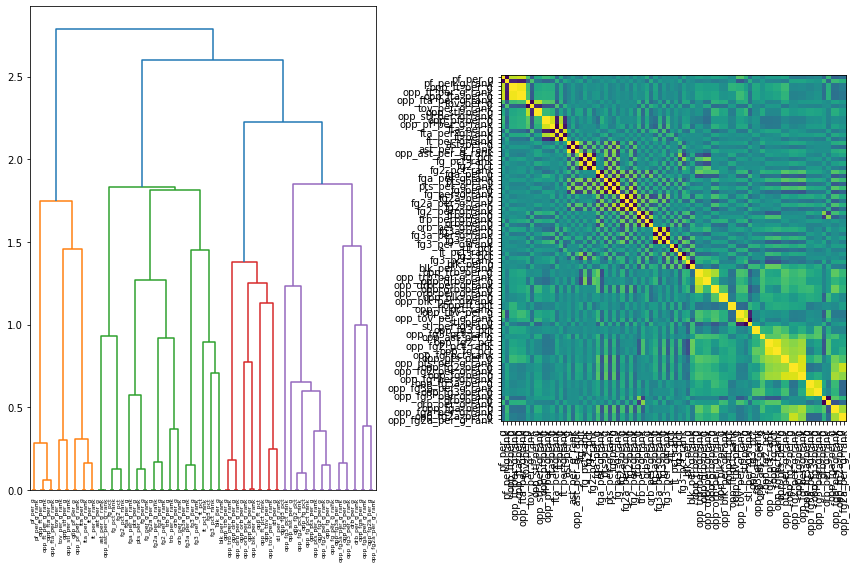

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=column_names, ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
fig.tight_layout()
plt.show()